In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Handle Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
# Detect Outliers Using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Detect outliers in "SalePrice"
outliers = detect_outliers_iqr(df, "SalePrice")
print(f"Number of outliers in SalePrice: {len(outliers)}")

Number of outliers in SalePrice: 61


In [ ]:
# Remove Outliers
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df = remove_outliers(df, "SalePrice")

In [ ]:
# Select Features & Target Variable
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove("Id")
num_features.remove("SalePrice")  # Target variable

X = df[num_features]
y = df["SalePrice"]

In [ ]:
#Log Transform Target (to reduce skewness)
y = np.log1p(y)

In [ ]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize Features (Important for L1/L2 Regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define Models (Lasso & Ridge)
lasso = Lasso()
ridge = Ridge()

In [ ]:
# Define Hyperparameter Grid
param_grid = {"alpha": np.logspace(-3, 3, 50)}  # Alpha values from 0.001 to 1000

In [ ]:
# Hyperparameter Tuning (Grid Search)
lasso_grid = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

lasso_grid.fit(X_train_scaled, y_train)
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2....
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [ ]:
# Get Best Hyperparameters
best_lasso = lasso_grid.best_estimator_
best_ridge = ridge_grid.best_estimator_

print(f"Best Lasso Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Best Ridge Alpha: {ridge_grid.best_params_['alpha']}")

Best Lasso Alpha: 0.004094915062380427
Best Ridge Alpha: 104.81131341546852


In [ ]:
#Evaluate on Test Set
lasso_pred = best_lasso.predict(X_test_scaled)
ridge_pred = best_ridge.predict(X_test_scaled)

lasso_mse = mean_squared_error(y_test, lasso_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print(f"Lasso Test MSE: {lasso_mse:.4f}")
print(f"Ridge Test MSE: {ridge_mse:.4f}")

Lasso Test MSE: 1387030041.2196
Ridge Test MSE: 1401305283.8739


In [ ]:
# Evaluate Model on Test Set
from sklearn.metrics import mean_squared_error, r2_score

lasso_pred = best_lasso.predict(X_test_scaled)
ridge_pred = best_ridge.predict(X_test_scaled)

# Compute Metrics
lasso_mse = mean_squared_error(y_test, lasso_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

lasso_rmse = np.sqrt(lasso_mse)
ridge_rmse = np.sqrt(ridge_mse)

lasso_r2 = r2_score(y_test, lasso_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Print Results
print(f"Lasso Test MSE: {lasso_mse:.4f}")
print(f"Lasso Test RMSE: {lasso_rmse:.4f}")
print(f"Lasso Test R²: {lasso_r2:.4f}")
print("\n")
print(f"Ridge Test MSE: {ridge_mse:.4f}")
print(f"Ridge Test RMSE: {ridge_rmse:.4f}")
print(f"Ridge Test R²: {ridge_r2:.4f}")


Lasso Test MSE: 0.0156
Lasso Test RMSE: 0.1251
Lasso Test R²: 0.8648


Ridge Test MSE: 0.0158
Ridge Test RMSE: 0.1256
Ridge Test R²: 0.8636


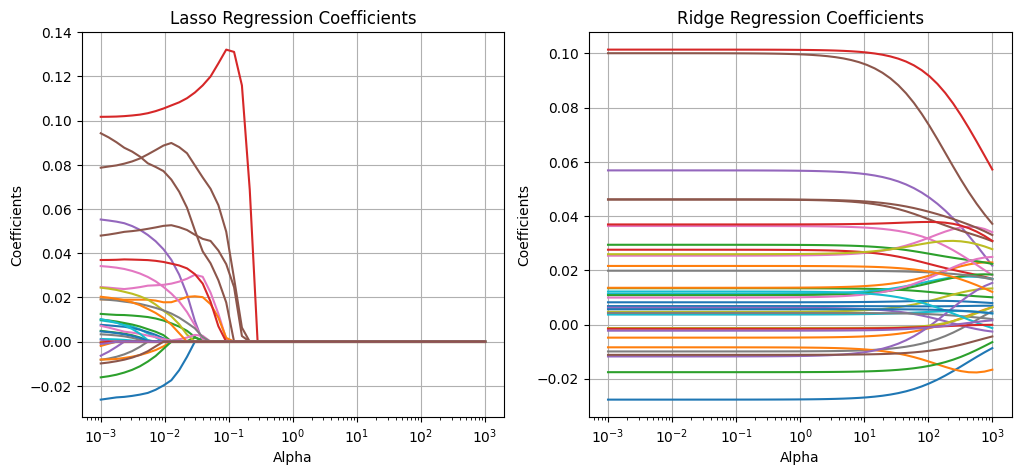

In [ ]:
# Coefficient Shrinkage
alphas = np.logspace(-3, 3, 50)
lasso_coefs = []
ridge_coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha).fit(X_train_scaled, y_train)
    ridge = Ridge(alpha=alpha).fit(X_train_scaled, y_train)

    lasso_coefs.append(lasso.coef_)
    ridge_coefs.append(ridge.coef_)

plt.figure(figsize=(12, 5))

# Lasso Coefficients
plt.subplot(1, 2, 1)
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Regression Coefficients')
plt.grid()

# Ridge Coefficients
plt.subplot(1, 2, 2)
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Regression Coefficients')
plt.grid()

plt.show()
